In [20]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%run IndianLiverPatientData.ipynb
%run LogReg.ipynb
%run LDAQDA.ipynb
%run NeuralNetwork.ipynb
%run NeuralNetworkAndrew.ipynb
%run KNN.ipynb

%matplotlib inline

In [2]:
# We read the data and pre-process it. Functions and explanations can be found in IndianLiverPatientData.ipynb file.

data = pd.read_csv('indian-liver-patient-records/data.csv')
X_train, y_train, X_valid, y_valid, X_test, y_test = preProcessing(data,trainProp=.7)

In [7]:
# Logistic Regression

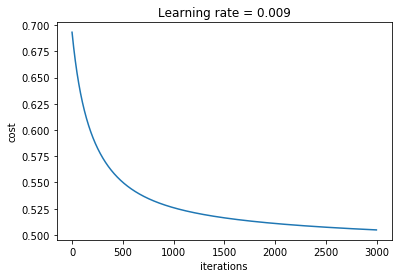

In [3]:
# First analysis can be to use a logistic regression model with no regularization, a learning rate of 0.009 and 1000 iterations.

w, b, costs = gradientDescentLogReg(X_train,y_train,0.009,3000,regu=0,lambd=0.5)

# Then, we plot the learning curve. The behavior we expected.

plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate = 0.009")
plt.show()

In [4]:
# Once we have the estimated parameters w and b, we predict the y labels of the training set and calculate its accuracy.
# If the accuracy is too low, our model has a high bias issue.

y_predict_train = classificatorLogReg(X_train,w,b)
print("Accuracy for the training set is {}%".format(np.round(100-np.mean(np.abs(y_predict_train-y_train))*100,decimals=2)))

Accuracy for the training set is 71.85%




Learning Rate: 0.001
Train Accuracy: 70.86%
Validation Accuracy: 71.26%


Learning Rate: 0.01
Train Accuracy: 71.6%
Validation Accuracy: 73.56%


Learning Rate: 0.1
Train Accuracy: 70.62%
Validation Accuracy: 75.86%


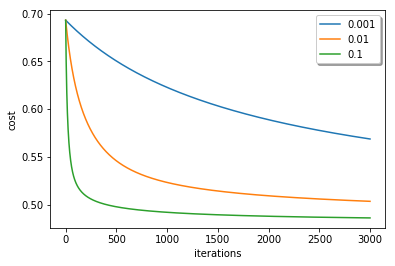

In [5]:
# We train our model for 3 different learning rate values and evaluate the results using the validation data set.
# The test set cannot be used for it because we would be overfitting in the test set.

learningRate = [0.001,0.01,0.1]

for i in learningRate:
    w, b, costs = gradientDescentLogReg(X_train,y_train,i,3000,regu=0,lambd=0)
    plt.plot(costs,label=i)
    
    print("\n\nLearning Rate: {}".format(i))
    
    y_predict_train = classificatorLogReg(X_train,w,b)
    precision, recall, f1, accuracy = evalModelLogReg(y_predict_train,y_train)
    print("Train Accuracy: {}%".format(accuracy))
    y_predict_valid = classificatorLogReg(X_valid,w,b)
    precision, recall, f1, accuracy = evalModelLogReg(y_predict_valid,y_valid)
    print("Validation Accuracy: {}%".format(accuracy))
    
plt.ylabel('cost')
plt.xlabel('iterations')
legend = plt.legend(loc='best',shadow=True)
plt.show()



Lambda value: 0.1
Train Accuracy: 73.83%
Validation Accuracy: 72.41%


Lambda value: 0.5
Train Accuracy: 73.09%
Validation Accuracy: 72.41%


Lambda value: 0.9
Train Accuracy: 72.84%
Validation Accuracy: 70.11%


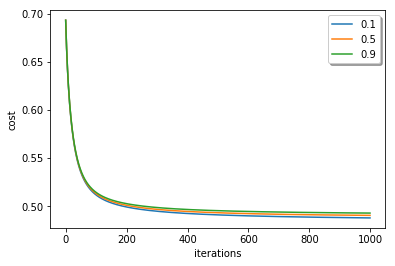

In [286]:
# It looks that the best learning rate is equal to 0'1.
# Now we train our model for 3 different lambda values and evaluate the results using the validation data set.
# We consider a L1 regularization.
# Again, the test set cannot be used for it because we would be overfitting in the test set.

lam = [0.1,0.5,0.9]

for j in lam:
    w, b, costs = gradientDescentLogReg(X_train,y_train,0.1,1000,1,j)
    plt.plot(costs,label=j)
    
    print("\n\nLambda value: {}".format(j))
    
    y_predict_train = classificatorLogReg(X_train,w,b)
    precision, recall, f1, accuracy = evalModelLogReg(y_predict_train,y_train)
    print("Train Accuracy: {}%".format(accuracy))
    y_predict_valid = classificatorLogReg(X_valid,w,b)
    precision, recall, f1, accuracy = evalModelLogReg(y_predict_valid,y_valid)
    print("Validation Accuracy: {}%".format(accuracy))

plt.ylabel('cost')
plt.xlabel('iterations')
legend = plt.legend(loc='best',shadow=True)
plt.show()



Lambda value: 0.1
Train Accuracy: 70.62%
Validation Accuracy: 75.86%


Lambda value: 0.5
Train Accuracy: 70.37%
Validation Accuracy: 75.86%


Lambda value: 0.9
Train Accuracy: 70.86%
Validation Accuracy: 75.86%


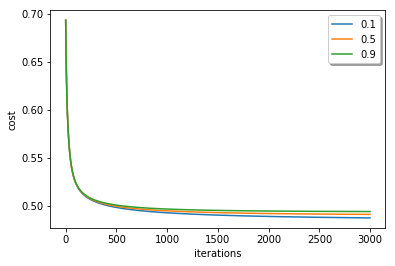

In [6]:
# It looks that the regularization term doesn't affect the performance that much for this problem.
# Now we repeat the same analysis but considering a L2 regularization.
# Again, the test set cannot be used for it because we would be overfitting in the test set.

lam = [0.1,0.5,0.9]

for j in lam:
    w, b, costs = gradientDescentLogReg(X_train,y_train,0.1,3000,2,j)
    plt.plot(costs,label=j)
    
    print("\n\nLambda value: {}".format(j))
    
    y_predict_train = classificatorLogReg(X_train,w,b)
    precision, recall, f1, accuracy = evalModelLogReg(y_predict_train,y_train)
    print("Train Accuracy: {}%".format(accuracy))
    y_predict_valid = classificatorLogReg(X_valid,w,b)
    precision, recall, f1, accuracy = evalModelLogReg(y_predict_valid,y_valid)
    print("Validation Accuracy: {}%".format(accuracy))

plt.ylabel('cost')
plt.xlabel('iterations')
legend = plt.legend(loc='best',shadow=True)
plt.show()

In [8]:
# LDA

In [9]:
# Again, it looks that the regularization term doesn't affect the performance that much for this problem.

# Now we use the LDA algorithm to model our data.
# We predict the y labels of the training set and calculate its accuracy.
# If the accuracy is too low, our model has a high bias issue.

estimations = ldaEstimation(X_train,y_train,K=2)
y_predict_train = classificatorLDA(X_train,estimations,K=2)
print("Accuracy for the training set is {}%".format(np.round(100-np.mean(np.abs(y_predict_train-y_train))*100,decimals=2)))

Accuracy for the training set is 71.6%


In [13]:
# Once we have checked the model doesn't suffer from high bias, we use the validation data to evaluate the LDA model.

estimations = ldaEstimation(X_train,y_train,K=2)
y_predict_valid = classificatorLDA(X_valid,estimations,K=2)
print("Accuracy for the validation set is {}%".format(np.round(100-np.mean(np.abs(y_predict_valid-y_valid))*100,decimals=2)))

Accuracy for the validation set is 74.71%


In [14]:
# QDA

In [15]:
# Now we use the QDA algorithm to model our data.
# We predict the y labels of the training set and calculate its accuracy.
# If the accuracy is too low, our model has a high bias issue.

estimations = qdaEstimation(X_train,y_train,K=2)
y_predict_train = classificatorQDA(X_train,estimations,K=2)
print("Accuracy for the training set is {}%".format(np.round(100-np.mean(np.abs(y_predict_train-y_train))*100,decimals=2)))

Accuracy for the training set is 56.79%


In [16]:
# Once we have checked the model doesn't suffer from high bias, we use the validation data to evaluate the QDA model.

estimations = qdaEstimation(X_train,y_train,K=2)
y_predict_valid = classificatorQDA(X_valid,estimations,K=2)
print("Accuracy for the validation set is {}%".format(np.round(100-np.mean(np.abs(y_predict_valid-y_valid))*100,decimals=2)))

Accuracy for the validation set is 49.43%


In [17]:
# Neural Networks

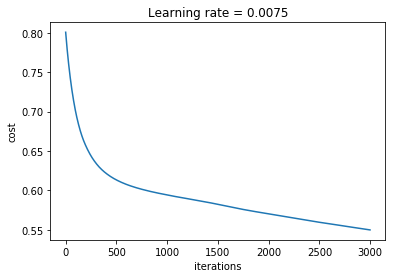

In [21]:
# Now we try a Neural Network model with 2 hidden layers and one output layer.

dimLayers = (X_train.shape[0],7,5,1)
parameters, costs = NNmodel(X_train,y_train,dimLayers,0.0075,3000,regu=0,lambd=0)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate = 0.0075")
plt.show()

In [22]:
# The accuracy for our training and validation set is:

y_predict_train = classificatorNN(X_train,parameters)
print("Accuracy for the training set is {} %".format(np.round(100-np.mean(np.abs(y_predict_train-y_train))*100,decimals=2)))

y_predict_valid = classificatorNN(X_valid,parameters)
print("Accuracy for the valid set is {} %".format(np.round(100-np.mean(np.abs(y_predict_valid-y_valid))*100,decimals=2)))

Accuracy for the training set is 72.35 %
Accuracy for the valid set is 70.11 %




Lambda value: 0.1
Train Accuracy: 70.62%
Validation Accuracy: 75.86%


Lambda value: 0.5
Train Accuracy: 72.84%
Validation Accuracy: 75.86%


Lambda value: 0.9
Train Accuracy: 70.62%
Validation Accuracy: 75.86%


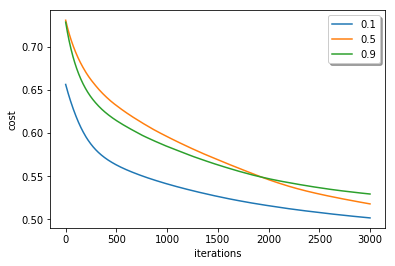

In [23]:
# We train our model for 3 different lambda values and evaluate the results using the validation data set.
# We consider a L1 regularization.
# Again, the test set cannot be used for it because we would be overfitting in the test set.

lam = [0.1,0.5,0.9]
dimLayers = (X_train.shape[0],7,5,1)

for j in lam:
    parameters, costs = NNmodel(X_train,y_train,dimLayers,0.0075,3000,1,j)
    plt.plot(costs,label=j)
    
    print("\n\nLambda value: {}".format(j))
    
    y_predict_train = classificatorNN(X_train,parameters)
    precision, recall, f1, accuracy = evalModelLogReg(y_predict_train,y_train)
    print("Train Accuracy: {}%".format(accuracy))
    y_predict_valid = classificatorLogReg(X_valid,w,b)
    precision, recall, f1, accuracy = evalModelLogReg(y_predict_valid,y_valid)
    print("Validation Accuracy: {}%".format(accuracy))

plt.ylabel('cost')
plt.xlabel('iterations')
legend = plt.legend(loc='best',shadow=True)
plt.show()



Lambda value: 0.1
Train Accuracy: 71.11%
Validation Accuracy: 75.86%


Lambda value: 0.5
Train Accuracy: 73.33%
Validation Accuracy: 75.86%


Lambda value: 0.9
Train Accuracy: 70.37%
Validation Accuracy: 75.86%


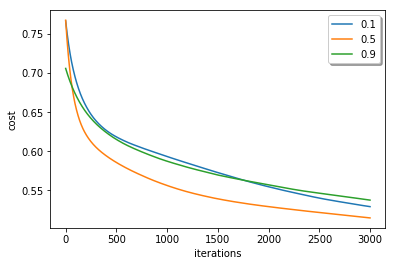

In [24]:
# It looks that the regularization term doesn't affect the performance that much for this problem.
# Now we repeat the same analysis but considering a L2 regularization.
# Again, the test set cannot be used for it because we would be overfitting in the test set.

lam = [0.1,0.5,0.9]
dimLayers = (X_train.shape[0],7,5,1)

for j in lam:
    parameters, costs = NNmodel(X_train,y_train,dimLayers,0.0075,3000,2,j)
    plt.plot(costs,label=j)
    
    print("\n\nLambda value: {}".format(j))
    
    y_predict_train = classificatorNN(X_train,parameters)
    precision, recall, f1, accuracy = evalModelLogReg(y_predict_train,y_train)
    print("Train Accuracy: {}%".format(accuracy))
    y_predict_valid = classificatorLogReg(X_valid,w,b)
    precision, recall, f1, accuracy = evalModelLogReg(y_predict_valid,y_valid)
    print("Validation Accuracy: {}%".format(accuracy))

plt.ylabel('cost')
plt.xlabel('iterations')
legend = plt.legend(loc='best',shadow=True)
plt.show()

In [26]:
# K-Nearest Neighbors

In [27]:
# Another classification algorithm we can use is the k-Nearest Neighbors method.

y_predicted_train = KNNModel(X_train,y_train,X_train,K=3,distance="Euclidean")
(Precision,Recall,F1,Accuracy) = evalModelKNN(y_predicted_train,y_train)

print("Accuracy for the train set is {} %".format(Accuracy))

Accuracy for the train set is 84.69 %


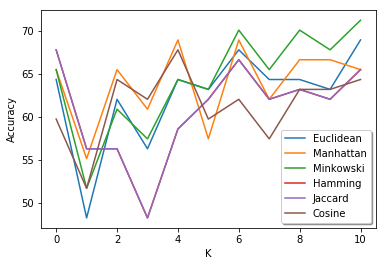

In [28]:
# We will use the validation set to tune the hyper-parameters: the type of distance and K.

distances = ["Euclidean","Manhattan","Minkowski","Hamming","Jaccard","Cosine"]
K = [1,2,3,4,5,6,7,8,9,10,11]

for i in distances:
    Accuracies = []
    for j in K:
        y_predict_valid = KNNModel(X_train,y_train,X_valid,j,i)
        (Precision,Recall,F1,Accuracy) = evalModelKNN(y_predict_valid,y_valid)
        Accuracies.append(Accuracy)
    plt.plot(Accuracies,label=i)
        
plt.ylabel('Accuracy')
plt.xlabel('K')
legend = plt.legend(loc='best',shadow=True)
plt.show()

In [31]:
# The best combination is Minkowski distance with K equals to 7.

y_predict_valid = KNNModel(X_train,y_train,X_valid,K=7,distance="Minkowski")
(Precision,Recall,F1,Accuracy) = evalModelKNN(y_predict_valid,y_valid)
print("Accuracy for the valid set is {} %".format(Accuracy))

Accuracy for the valid set is 70.11 %


In [32]:
# Final model

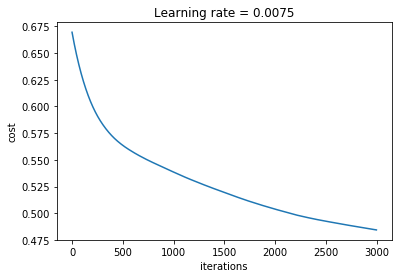

Accuracy for the valid set is 75.86 %


In [34]:
dimLayers = (X_train.shape[0],7,5,1)
parameters, costs = NNmodel(X_train,y_train,dimLayers,0.0075,3000,regu=0,lambd=0)

plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate = 0.0075")
plt.show()

y_predict_test = classificatorNN(X_test,parameters)
print("Accuracy for the valid set is {} %".format(np.round(100-np.mean(np.abs(y_predict_test-y_test))*100,decimals=2)))